In [232]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

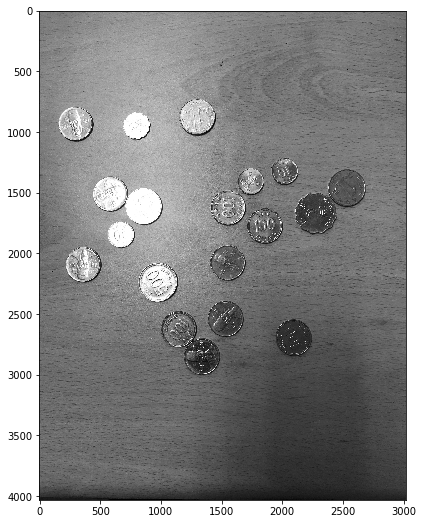

In [233]:
image = '/home/khan/cv/Image0/coins_set4.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

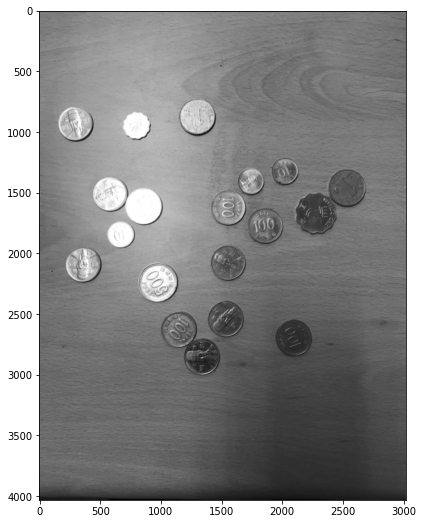

In [234]:
img =  cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [240]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 30, maxRadius = 180)
all_circs_rounded = np.uint16(np.around(all_circs))

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')


[[[ 974 2240  158]
  [1554 1624  143]
  [ 358 2090  147]
  [ 298  934  137]
  [ 860 1610  152]
  [ 586 1508  143]
  [1560 2080  136]
  [2026 1326  102]
  [ 676 1844  107]
  [1538 2544  150]
  [1862 1772  154]
  [1146 2632  140]
  [1306  876  141]
  [1746 1406  104]
  [1332 2854  160]
  [2540 1460  151]
  [2242 1670   32]
  [2098 2692  142]
  [ 858 1018   35]]]
(1, 19, 3)
I have found 19 coins.


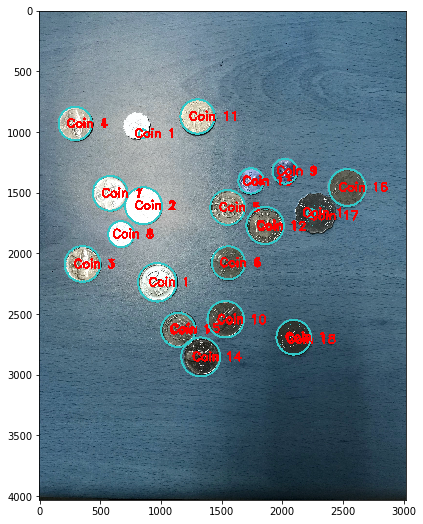

In [242]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2],(50, 200, 200), 15)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 5)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(img_orig)